In [1]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time
import root_pandas as rpd
from root_pandas import read_root

mpl.rcParams['figure.figsize'] = 6.2,3.5
mpl.rcParams['axes.labelsize'] = 17
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['legend.fontsize']= 15

Welcome to JupyROOT 6.22/06


In [2]:
class correlation:
    def __init__(self, ntriggers, df, df_mixed):
        
        self.nbins_dphi = 6#32
        self.nbins_deta = 18#16
        self.ntriggers = ntriggers
        self.phibins = np.linspace(0, np.pi, self.nbins_dphi+1)#16+1) #was 16+1
        #        self.phibins = np.linspace(-np.pi, np.pi, self.nbins_dphi+1)#16+1) #was 16+1
        #self.etabins = np.linspace(-np.pi, np.pi, self.nbins_deta+1)#16+1) #was 16+1
        self.etabins = np.linspace(-0.5, 4, self.nbins_deta+1) #was 16+1        
        
        
        self.bincenters_dphi = [np.mean([x, y]) for (x, y) in zip(self.phibins[:-1], self.phibins[1:])]
        self.bincenters_deta = [np.mean([x, y]) for (x, y) in zip(self.etabins[:-1], self.etabins[1:])]
        
        dphi = list(df['dphi'])
        #dphi_lab = list(df['dphi_lab'])
        #deta = list(df['drap'])
        mixed_dphi = list(df_mixed['dphi'])
        #mixed_dphi_lab = list(df_mixed['dphi_lab'])
        #mixed_deta = list(df_mixed['drap'])
        
        self.numberofpairs = df.shape[0]
        
        #1D correlations
        #dphi
        self.sameh_dphi =myHisto(dphi, self.phibins) # np.histogram(dphi, self.phibins)[0]
        self.sameh_dphi.norm(ntriggers)   
        self.mixh_dphi  =myHisto(mixed_dphi, self.phibins)
        norm = sum(self.mixh_dphi.y)#/self.nbins_dphi
        self.mixh_dphi.norm(norm)
        self.corr_dphi = np.true_divide(self.sameh_dphi.y,self.mixh_dphi.y)
        self.corr_dphi_err = np.true_divide(self.sameh_dphi.yerr,self.mixh_dphi.y)

        #dphi in lab frame
        #self.sameh_dphi_lab =myHisto(dphi_lab, self.phibins) # np.histogram(dphi, self.phibins)[0]
        #self.sameh_dphi_lab.norm(ntriggers)   
        #self.mixh_dphi_lab  =myHisto(mixed_dphi_lab, self.phibins)
        #norm = sum(self.mixh_dphi_lab.y)/self.nbins_dphi
        #self.mixh_dphi_lab.norm(norm)
        #self.corr_dphi_lab = np.true_divide(self.sameh_dphi_lab.y,self.mixh_dphi_lab.y)
        #self.corr_dphi_lab_err = np.true_divide(self.sameh_dphi_lab.yerr,self.mixh_dphi_lab.y)

        
        
        
        #self.sameh_deta =myHisto(deta, self.etabins) # np.histogram(dphi, self.phibins)[0]
        #self.sameh_deta.norm(ntriggers)
        #self.mixh_deta  =myHisto(mixed_deta, self.etabins)
        #norm = sum(self.mixh_deta.y)/self.nbins_deta #sum(self.mixh_deta.y)/self.nbins_deta
        #self.mixh_deta.norm(norm)
        #self.corr_deta     = np.true_divide(self.sameh_deta.y,self.mixh_deta.y)
        #self.corr_deta_err = np.true_divide(self.sameh_deta.yerr,self.mixh_deta.y)

        # 2D correlations
        
        #self.sameh_2d, self.xedges,self.yedges = np.histogram2d(deta,dphi, [self.etabins,self.phibins])
        #self.mixh_2d, self.xedges,self.yedges = np.histogram2d(mixed_deta,mixed_dphi, [self.etabins,self.phibins])

        #get correlation function
        #self.corr_2d = np.true_divide(self.sameh_2d,self.mixh_2d)
        #self.extent = [self.xedges[0], self.xedges[-1], self.yedges[0], self.yedges[-1]]
        
        #MASS: 
        #self.hmass, self.hmass_x = np.histogram(df['pair_mass'],range=(0.0,2.0),density=True, bins=50)
        #self.hmass_mix, self.hmass_x = np.histogram(df_mixed['pair_mass'],range=(0.0,2.0),density=True,bins=50)
        #self.hmass_x = (self.hmass_x[1:] + self.hmass_x[:-1])/2.0
        
        #self.hxmass, self.hxmass_x = np.histogram(df['missing_mass'],range=(0.0,2.0),density= True, bins=50)
        #self.hxmass_mix, self.hxmass_x = np.histogram(df_mixed['missing_mass'],range=(0.0,2.0),density=True,bins=50)
        #self.hxmass_x = (self.hxmass_x[1:] + self.hxmass_x[:-1])/2.0
        
        #self.t, self.t_x = np.histogram(df['t'],range=(0.0,5.0), density= True, bins=50)
        #self.t_mix, self.t_x = np.histogram(df_mixed['t'],range=(0.0,5.0),density=True,bins=50)
        #self.t_x = (self.t_x[1:] + self.t_x[:-1])/2.0
        
        #self.dipion_pt, self.dipion_pt_x = np.histogram(df['pair_pt'],range=(0.0,2.0), density = True, bins=50)
        #self.dipion_pt_mix, self.dipion_pt_x = np.histogram(df_mixed['pair_pt'],range=(0.0,2.0),density=True,bins=50)
        #self.dipion_pt_x = (self.dipion_pt_x[1:] + self.dipion_pt_x[:-1])/2.0
        

    def normalize(self,norma):
        #print 'sum entrifes beforoe normalization' ,np.sum(self.corr_dphi)
        #print 'requested normalization' , norma
        self.corr_dphi     = np.true_divide(self.corr_dphi, norma)
        #print ' sum entries after normalization', np.sum(self.corr_dphi)
        self.corr_dphi_err = np.true_divide(self.corr_dphi_err,norma)
        
        #self.sameh_dphi_lab.y = np.true_divide(self.sameh_dphi_lab.y,norma)
        self.sameh_dphi.y = np.true_divide(self.sameh_dphi.y,norma)
        #self.sameh_dphi_lab.yerr = np.true_divide(self.sameh_dphi_lab.yerr,norma)
        self.sameh_dphi.yerr = np.true_divide(self.sameh_dphi.yerr,norma)
        
        
        return 

class comparison:
    def __init__(self, corr_A, corr_D):
        
        self.corr_A = corr_A.corr_dphi
        self.corr_D = corr_D.corr_dphi
        self.err_A  = corr_A.corr_dphi_err
        self.err_D  = corr_D.corr_dphi_err
        self.dif_err = np.sqrt(np.power(self.err_A,2.0)+np.power(self.err_D,2.0)) #error for difference
        self.diff  = np.subtract(self.corr_A,self.corr_D)
        self.ratio = np.true_divide(self.corr_A,self.corr_D)
        self.ratio_err = np.sqrt(np.power(np.divide(self.err_A,self.corr_A),2.0)+np.power(np.divide(self.err_D,self.corr_D),2.0))*self.ratio 
        
       
        
class myHisto:
    def __init__(self, data, bins):
        self.bins = bins
        self.y    = np.histogram(data, self.bins)[0]
        self.yerr = np.sqrt(self.y)
    def norm(self, norm=1.0):
        self.y = np.true_divide(self.y, norm)
        self.yerr = np.true_divide(self.yerr, norm)

In [3]:
def getRatio(df_A,df_D,df_trigger_A,df_trigger_D, variable='h2_z',trig_cut = 'h1_z>0.5', pair_cut='',minz=0.08,maxz=0.45,nbins=9, applyweight=False):
    #get number of pions with z>0.5
    print ('Print Trigger Cut ' ,trig_cut)
    print ('Total Cut ', trig_cut + pair_cut)
    
    norm_A = df_trigger_A.query(trig_cut).shape[0]
    norm_D = df_trigger_D.query(trig_cut).shape[0]
    
    #norm_A , xx = np.histogram( df_trigger_A.query(trig_cut),bins=np.array([0.5,1.0]))
    
    if(applyweight):
        y_A, x_conditional = np.histogram(df_A.query(trig_cut+pair_cut)[variable],bins=np.logspace(np.log10(minz), np.log10(maxz),nbins),weights=df_A.query(trig_cut+pair_cut)['weight'])
        y_D, x_conditional = np.histogram(df_D.query(trig_cut+pair_cut)[variable],bins=np.logspace(np.log10(minz), np.log10(maxz),nbins),weights=df_D.query(trig_cut+pair_cut)['weight'])
        erry_A, x_conditional = np.histogram(df_A.query(trig_cut+pair_cut)[variable],bins=np.logspace(np.log10(minz), np.log10(maxz),nbins),weights=df_A.query(trig_cut+pair_cut)['weight2'])
        erry_D, x_conditional = np.histogram(df_D.query(trig_cut+pair_cut)[variable],bins=np.logspace(np.log10(minz), np.log10(maxz),nbins),weights=df_D.query(trig_cut+pair_cut)['weight2'])
    
    else:
        y_A, x_conditional = np.histogram(df_A.query(trig_cut+pair_cut)[variable],bins=np.logspace(np.log10(minz), np.log10(maxz),nbins))
        y_D, x_conditional = np.histogram(df_D.query(trig_cut+pair_cut)[variable],bins=np.logspace(np.log10(minz), np.log10(maxz),nbins))
        erry_A, x_conditional = np.histogram(df_A.query(trig_cut+pair_cut)[variable],bins=np.logspace(np.log10(minz), np.log10(maxz),nbins))
        erry_D, x_conditional = np.histogram(df_D.query(trig_cut+pair_cut)[variable],bins=np.logspace(np.log10(minz), np.log10(maxz),nbins))
  
    x_conditional = (x_conditional[1:] + x_conditional[:-1])/2.0
    err_A = np.true_divide(np.sqrt(erry_A),y_A)
    err_D = np.true_divide(np.sqrt(erry_D),y_D)
    y_A = np.true_divide(y_A,norm_A)
    y_D = np.true_divide(y_D,norm_D)
    ratio_conditional = np.true_divide(y_A,y_D)
    error_conditional = np.multiply(ratio_conditional, np.sqrt(np.power(err_A,2.0) + np.power(err_D,2.0)))
    
    return ratio_conditional,error_conditional,x_conditional

In [4]:
def applyCut(inputDataframe, cut, text=None):
    nbeforecut = inputDataframe.shape[0]
    cutDataframe = None
    if nbeforecut>0:
        cutDataframe = inputDataframe.query(cut)
        if text:
            print (text, cutDataframe.shape[0], ' (%2.2f '%(100.0*cutDataframe.shape[0]/nbeforecut), '%)')
    return cutDataframe
def applyCuts(fullDataframe,name='default',isMC=False,isTrigger=True): 
    dataframe = fullDataframe
    if(dataframe.shape[0]>0):
        print ('Entries before cut ', dataframe.shape[0])
    dataframe.eval('inelasticity = nu/5.014', inplace=True)

    dataframe.eval('h1_e = h1_z*nu', inplace=True)
    dataframe.eval('h1_p = sqrt(h1_e*h1_e-0.138*0.138)', inplace=True)
    
    dataframe = applyCut(dataframe, 'Q2>1.0', 'Q2>1.0 :')
    #dataframe = applyCut(dataframe, 'Nu>3.0 and Nu<3.5', '3.0 < Nu < 3.5')
    #dataframe = applyCut(dataframe, 'h_z>0.5', 'h_z>0.5 :')
    dataframe = applyCut(dataframe, 'h1_p <2.5 ', 'h1_p<2.5 ')

    dataframe = applyCut(dataframe, 'inelasticity<0.85','inelasticity < 0.85')
    return dataframe

def applyCutsPair(fullDataframe,name='default',isMC=False):
    print ('Starting election on dipion variables')
    if (isMC):
        print ('This is MC')
    else: 
        print ('This is Data')
    
    dataframe = fullDataframe
    dataframe.eval('z_tot = h1_z+ h2_z', inplace=True)
    dataframe.eval('h1_e = h1_z*nu', inplace=True)
    dataframe.eval('h1_p = sqrt(h1_e*h1_e-0.138*0.138)', inplace=True)
    dataframe.eval('h2_e = h2_z*nu', inplace=True)
    dataframe.eval('h2_p = sqrt(h2_e*h2_e-0.138*0.138)', inplace=True)
    dataframe = applyCut(dataframe, 'Q2>1.0', 'Q2>1.0 :')
    #dataframe = applyCut(dataframe, 'nu>3.0 and nu<3.5', '3.0 < nu < 3.5')
    dataframe = applyCut(dataframe, 'h1_z>0.5', 'h1_z>0.5 :')
    dataframe = applyCut(dataframe, 'h1_p <2.5 ', 'h1_p<2.5 ')

    #dataframe = applyCut(dataframe, 'h1_pid*h2_pid<0', 'Opposite sign pairs')
    dataframe.eval('pair_pt2 = pair_pt*pair_pt', inplace=True)
    dataframe = applyCut(dataframe, 'h2_pid==2212 | abs(h2_pid)==211', 'h2_pid =2212 or pions') 

    ##Polar angle acceptance, different for 
    #if(isMC==False):
    #    print 'Polar angle acceptance'
    #    dataframe = applyCut(dataframe,'(pid_asso==211 & theta_lab_asso>10 & theta_lab_asso<90)|(pid_asso==-211 & theta_lab_asso>45 & theta_lab_asso<90)')
    if (not isMC):
        
        dataframe = applyCut(dataframe, 'h2_th<120 and h2_th>10', '10< h2_th<120')
        dataframe = applyCut(dataframe, 'h2_p>0.200', 'h2_p>0.200')
        #dataframe = applyCut(dataframe,'(h2_pid==211)| (h2_pid==-211 & h2_th>30)| (h2_pid==-211 & h2_th<30 & h2_p>0.600)','P>500 for pi- with theta<30')
        #dataframe = applyCut(dataframe,'(pid_asso==211 & theta_lab_asso>10.0)|(pid_asso==-211 & theta_lab_asso>30 & theta_lab_asso<120)')
    dataframe = applyCut(dataframe, 'h2_p<2.5', 'h2_p <2.5 GeV')
    #dataframe = applyCut(dataframe, 'mass<2.0', 'mass < 2.0 GeV')
    
    return dataframe

def printPairBreakdown(dataframe):
    allpairs = 1.0*dataframe.shape[0]
    print ('All pairs ', allpairs)
    print ('Pairs with Leading pi+', np.true_divide(dataframe.query('h1_pid==211').shape[0],allpairs))
    print ('Pairs with Leading pi-', dataframe.query('h1_pid==-211').shape[0]/allpairs)
    print ('Pairs with Sub-Leading pi+', dataframe.query('h2_pid==211').shape[0]/allpairs)
    print ('Pairs with Sub-Leading pi-', dataframe.query('h2_pid==-211').shape[0]/allpairs)
    print ('pi+ pi+ pairs',dataframe.query('h1_pid==211 and h2_pid==211').shape[0]/allpairs)
    print ('pi- pi- pairs',dataframe.query('h1_pid==-211 and h2_pid==-211').shape[0]/allpairs)
    print ('pi+ pi- pairs',dataframe.query('h1_pid==211 and h2_pid==-211').shape[0]/allpairs)
    print ('pi- pi+ pairs',dataframe.query('h1_pid==-211 and h2_pid==211').shape[0]/allpairs)
    print ('//////////////////////////////////////////////////////')
    return 


## Get data from Ntuples to dataframes

In [5]:
#this needs to be read in chunks otherwise it uses all memory. (from https://github.com/scikit-hep/root_pandas)
def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    for df in read_root(filename, treename, chunksize=100000) :
        #print df.shape[0]
        dataframe = pd.concat([dataframe,df])
    
    print (dataframe.shape[0])
    return dataframe
    
    

## Get data

In [6]:
df = {}
df_trigger = {}

for target in ['C','Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    df[target]=getdatainChunks('Pairs_%s.root'%target, target)
    df['%s_mix'%target] = getdatainChunks('Pairs_%s.root'%target, '%s_mix'%target)
    df['D_%s'%target]= getdatainChunks('Pairs_%s.root'%target, 'D_%s'%target)
    df['D_%s_mix'%target] = getdatainChunks('Pairs_%s.root'%target, 'D_%s_mix'%target)
    
    print ('Get trigger dataframes from target%s'%target)
    df_trigger['%s_trigger'%target] = getdatainChunks('Pairs_%s.root'%target, '%s_trigger'%target)
    df_trigger['D_%s_trigger'%target] = getdatainChunks('Pairs_%s.root'%target, 'D_%s_trigger'%target)
    

Getting dataframes from target C
235958
538211
326770
739940
Get trigger dataframes from targetC
979565
1308621
Getting dataframes from target Fe
186543
406467
351312
797957
Get trigger dataframes from targetFe
840718
1412003
Getting dataframes from target Pb
95275
186947
495372
1131317
Get trigger dataframes from targetPb
456178
2005569


## GiBUU 

In [7]:
for target in ['D','C','Fe','Pb']:#,'Fe','C']:
    #GiBUU
    print (target)
    print ('----pairs')
    df['GiBUU_%s'%target]= getdatainChunks('GiBUU_Pairs_%s.root'%target, target)
    print ('----trigger')
    df_trigger['GiBUU_%s_trigger'%target]= getdatainChunks('GiBUU_Pairs_%s.root'%target, '%s_trigger'%target)

D
----pairs
2099630
----trigger
2047709
C
----pairs
2226123
----trigger
2011729
Fe
----pairs
1014645
----trigger
874492
Pb
----pairs
1148422
----trigger
999262


## Combine the deuterium datasets 

In [8]:
df['D'] = pd.concat([df['D_Pb'],df['D_Fe'],df['D_C']]) #simply combine the deuterium results for all targets
df['D_mix'] = pd.concat([df['D_Pb_mix'],df['D_Fe_mix'],df['D_C_mix']]) #simply combine the deuterium results for all targets
df_trigger['D_trigger'] = pd.concat([df_trigger['D_Pb_trigger'],df_trigger['D_Fe_trigger'],df_trigger['D_C_trigger']]) #simply combine the deuterium results for all targets

## Apply selection

In [9]:
#dataframees with pairs
for key in df.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print (key)
    
    df[key] = applyCuts(df[key],isMC=isMC)
    #printPairBreakdown(df[key])
    df[key] = applyCutsPair(df[key],isMC=isMC)

C
Entries before cut  235958
Q2>1.0 : 235958  (100.00  %)
h1_p<2.5  223479  (94.71  %)
inelasticity < 0.85 214837  (96.13  %)
Starting election on dipion variables
This is Data
Q2>1.0 : 214837  (100.00  %)
h1_z>0.5 : 92795  (43.19  %)
h1_p<2.5  92795  (100.00  %)
h2_pid =2212 or pions 92795  (100.00  %)
10< h2_th<120 91385  (98.48  %)
h2_p>0.200 86290  (94.42  %)
h2_p <2.5 GeV 86262  (99.97  %)
C_mix
Entries before cut  538211
Q2>1.0 : 538211  (100.00  %)
h1_p<2.5  483102  (89.76  %)
inelasticity < 0.85 468346  (96.95  %)
Starting election on dipion variables
This is Data
Q2>1.0 : 468346  (100.00  %)
h1_z>0.5 : 247826  (52.92  %)
h1_p<2.5  247826  (100.00  %)
h2_pid =2212 or pions 247826  (100.00  %)
10< h2_th<120 233082  (94.05  %)
h2_p>0.200 215353  (92.39  %)
h2_p <2.5 GeV 212358  (98.61  %)
D_C
Entries before cut  326770
Q2>1.0 : 326770  (100.00  %)
h1_p<2.5  307132  (93.99  %)
inelasticity < 0.85 296107  (96.41  %)
Starting election on dipion variables
This is Data
Q2>1.0 : 296107

## Apply cuts for trigger dataframes

In [10]:
for key in df_trigger.keys():
    print (key)
    df_trigger[key] = applyCuts(df_trigger[key])
    print (' ') 

C_trigger
Entries before cut  979565
Q2>1.0 : 979565  (100.00  %)
h1_p<2.5  879349  (89.77  %)
inelasticity < 0.85 852480  (96.94  %)
 
D_C_trigger
Entries before cut  1308621
Q2>1.0 : 1308621  (100.00  %)
h1_p<2.5  1164842  (89.01  %)
inelasticity < 0.85 1131507  (97.14  %)
 
Fe_trigger
Entries before cut  840718
Q2>1.0 : 840718  (100.00  %)
h1_p<2.5  759898  (90.39  %)
inelasticity < 0.85 736891  (96.97  %)
 
D_Fe_trigger
Entries before cut  1412003
Q2>1.0 : 1412003  (100.00  %)
h1_p<2.5  1259420  (89.19  %)
inelasticity < 0.85 1226691  (97.40  %)
 
Pb_trigger
Entries before cut  456178
Q2>1.0 : 456178  (100.00  %)
h1_p<2.5  412015  (90.32  %)
inelasticity < 0.85 398168  (96.64  %)
 
D_Pb_trigger
Entries before cut  2005569
Q2>1.0 : 2005569  (100.00  %)
h1_p<2.5  1785299  (89.02  %)
inelasticity < 0.85 1735898  (97.23  %)
 
GiBUU_D_trigger
Entries before cut  2047709
Q2>1.0 : 2047709  (100.00  %)
h1_p<2.5  1052848  (51.42  %)
inelasticity < 0.85 1052848  (100.00  %)
 
GiBUU_C_trigger

In [11]:
#for target in ['C','Fe','Pb']:
#df['%s'%target]['weight'] = df['%s'%target].apply(lambda x: getAcceptance(x['P_asso'], x['theta_lab_asso'],x['pid_asso'],'solid'), axis=1)
#df['D_%s'%target]['weight'] = df['D_%s'%target].apply(lambda x: getAcceptance(x['P_asso'], x['theta_lab_asso'],x['pid_asso'],'liquid'), axis=1)#

#df['%s'%target]['weight2'] = df['%s'%target]['weight'].apply(lambda x: x*x)  
#df['D_%s'%target]['weight2'] = df['D_%s'%target]['weight'].apply(lambda x: x*x)  


## Event Mixing corrections

h1_z> 0.50 and h1_z<= 1.00  and h2_z>0.05 and h2_z<=0.08
206643
h1_z> 0.50 and h1_z<= 1.00  and h2_z>0.08 and h2_z<=0.15
206643
h1_z> 0.50 and h1_z<= 1.00  and h2_z>0.15 and h2_z<=0.30
206643
h1_z> 0.50 and h1_z<= 1.00  and h2_z>0.30 and h2_z<=0.50
206643


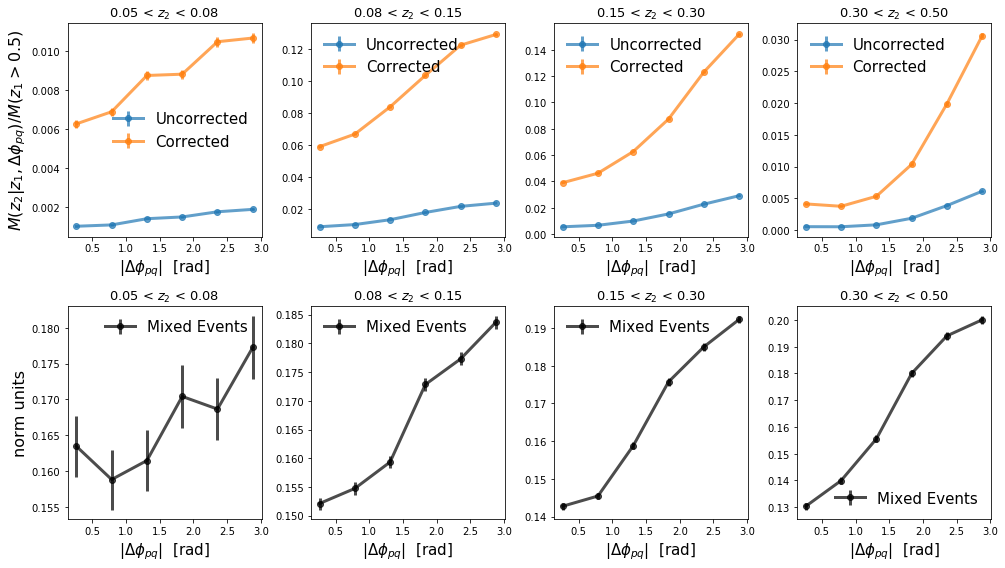

In [12]:
fig, axs = plt.subplots(2, 4, figsize=(14,8))
Edges = [0.4, 0.5,0.6,0.7,1.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]
asso_Edges = [0.05,0.08, 0.15,0.3,0.5]
asso_bins = [(x, y) for (x, y) in zip(asso_Edges[:-1], asso_Edges[1:])]

for j, asso_bin in enumerate(asso_bins):
    query_trigger = 'h1_z> %2.2f and h1_z<= %2.2f '%(0.5,1.0)
    query_asso = 'h2_z>%2.2f and h2_z<=%2.2f'%(asso_bin[0],asso_bin[1])
    query_total = query_trigger + ' and '+ query_asso
    print (query_total)
    print (df_trigger['Pb_trigger'].query(query_trigger).shape[0])
    corr = correlation(df_trigger['Pb_trigger'].query(query_trigger).shape[0], df['Pb'].query(query_total), df['Pb_mix'].query(query_total))
    corr_D = correlation(df_trigger['D_Pb_trigger'].query(query_trigger).shape[0], df['D_Pb'].query(query_total), df['D_Pb_mix'].query(query_total))
    
    axs[0,j].errorbar(corr_D.bincenters_dphi, corr_D.sameh_dphi.y, yerr=corr_D.sameh_dphi.yerr, linewidth=3.0,alpha=0.7,fmt='-o', label='Uncorrected')
    axs[0,j].errorbar(corr_D.bincenters_dphi, corr_D.corr_dphi, yerr=corr_D.corr_dphi_err, linewidth=3.0,alpha=0.7,fmt='-o', label='Corrected')

    axs[0,j].xaxis.set_label_text("|$\Delta\phi_{pq}$|  [rad]", fontsize=15)
    axs[0,j].legend(loc='best',frameon=False)
    axs[0,0].yaxis.set_label_text(r'$M(z_{2}|z_{1}, \Delta\phi_{pq})/M(z_{1}>0.5)$',fontsize=16)
    axs[0,j].set_title('%2.2f < $z_{2}$ < %2.2f'%(asso_bin[0],asso_bin[1]), fontsize=13)

    axs[1,j].set_title('%2.2f < $z_{2}$ < %2.2f'%(asso_bin[0],asso_bin[1]), fontsize=13)
    axs[1,j].errorbar(corr_D.bincenters_dphi, corr_D.mixh_dphi.y, yerr=corr_D.mixh_dphi.yerr, linewidth=3.0,alpha=0.7,fmt='-ko', label='Mixed Events')
    axs[1,0].yaxis.set_label_text('norm units',fontsize=16)
    axs[1,j].xaxis.set_label_text("|$\Delta\phi_{pq}$|  [rad]", fontsize=15)
    axs[1,j].legend(loc='best',frameon=False)

        
plt.tight_layout()
plt.savefig('EventMixing_AzimuthalCorrelations.png')

## Event mixing corrections for lab frame

In [14]:
#fig, axs = plt.subplots(2, 4,figsize=(14,8))
#Edges = [0.4, 0.5,0.6,0.7,1.0]
#bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]
#asso_Edges = [0.05,0.08, 0.15,0.3,0.5]
#asso_bins = [(x, y) for (x, y) in zip(asso_Edges[:-1], asso_Edges[1:])]

#for j, asso_bin in enumerate(asso_bins):
#    query_trigger = 'h1_z> %2.2f and h1_z<= %2.2f '%(0.5,1.0)
#    query_asso = 'h2_z>%2.2f and h2_z<=%2.2f'%(asso_bin[0],asso_bin[1])
#    query_total = query_trigger + ' and '+ query_asso
#    print (query_total)
#    print (df_trigger['Pb_trigger'].query(query_trigger).shape[0])
 #   corr = correlation(df_trigger['Pb_trigger'].query(query_trigger).shape[0], df['Pb'].query(query_total), df['Pb_mix'].query(query_total))
#    corr_D = correlation(df_trigger['D_Pb_trigger'].query(query_trigger).shape[0], df['D_Pb'].query(query_total), df['D_Pb_mix'].query(query_total))
    
#    axs[0,j].errorbar(corr_D.bincenters_dphi, corr_D.sameh_dphi_lab.y, yerr=corr_D.sameh_dphi_lab.yerr, linewidth=3.0,alpha=0.7,fmt='-o', label='Uncorrected')
#    axs[0,j].errorbar(corr_D.bincenters_dphi, corr_D.corr_dphi_lab, yerr=corr_D.corr_dphi_lab_err, linewidth=3.0,alpha=0.7,fmt='-o', label='Corrected')

#    axs[0,j].xaxis.set_label_text("|$\Delta\phi_{lab}$|  [rad]", fontsize=15)
#    axs[0,j].legend(loc='best',frameon=False)
#    axs[0,0].yaxis.set_label_text(r'$M(z_{2}|z_{1}, \Delta\phi_{lab})/M(z_{1}>0.5)$',fontsize=16)
#    axs[0,j].set_title('%2.2f < $z_{2}$ < %2.2f'%(asso_bin[0],asso_bin[1]), fontsize=13)

#    axs[1,j].set_title('%2.2f < $z_{2}$ < %2.2f'%(asso_bin[0],asso_bin[1]), fontsize=13)
##    axs[1,j].errorbar(corr_D.bincenters_dphi, corr_D.mixh_dphi_lab.y, yerr=corr_D.mixh_dphi_lab.yerr, linewidth=3.0,alpha=0.7,fmt='-ko', label='Mixed Events')
#    axs[1,0].yaxis.set_label_text('norm units',fontsize=16)
#    axs[1,j].xaxis.set_label_text("|$\Delta\phi_{lab}$|  [rad]", fontsize=15)
#    axs[1,j].legend(loc='best',frameon=False)

        
#plt.tight_layout()
#plt.savefig('EventMixing_AzimuthalCorrelations_LabFrame.png')

# Azimuthal correlations

h1_z> 0.50 and h1_z<= 1.00  and h2_z>0.10 and h2_z<=0.25 and h2_pid==2212 


<ipython-input-2-94cb84dbb8a6>:117: RuntimeWarning: invalid value encountered in true_divide
  self.y = np.true_divide(self.y, norm)
<ipython-input-2-94cb84dbb8a6>:118: RuntimeWarning: invalid value encountered in true_divide
  self.yerr = np.true_divide(self.yerr, norm)


h1_z> 0.50 and h1_z<= 1.00  and h2_z>0.25 and h2_z<=0.50 and h2_pid==2212 
h1_z> 0.50 and h1_z<= 1.00  and h2_z>0.50 and h2_z<=1.00 and h2_pid==2212 


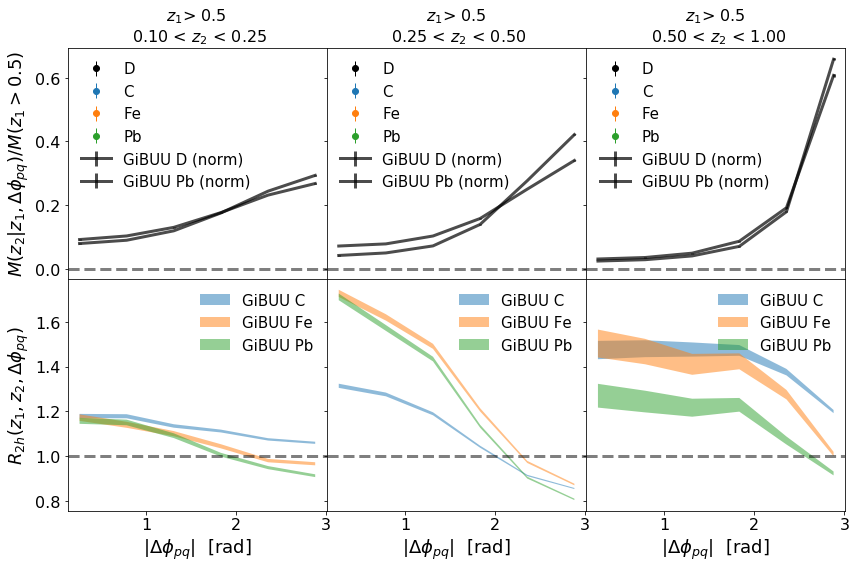

In [23]:
fig, axs = plt.subplots(2, 3,sharex=True,sharey='row', figsize=(12,8), gridspec_kw={'wspace':0, 'hspace':0})
Edges = [0.4, 0.5,0.6,0.7,1.0]
#Edges = [ -0.5,-0.2, 0.2, 0.5,1.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]
#asso_Edges = [0.06,0.1, 0.15,0.25,0.5]
#asso_Edges = [0.1,0.15,0.25,0.5]#,0.3,0.5]
asso_Edges = [0.1,0.25,0.5,1.0]#,0.3,0.5]

#asso_Edges =np.logspace(np.log10(0.05), np.log10(0.5),5)

asso_bins = [(x, y) for (x, y) in zip(asso_Edges[:-1], asso_Edges[1:])]

for j, asso_bin in enumerate(asso_bins):
    query_trigger = 'h1_z> %2.2f and h1_z<= %2.2f '%(0.5,1.0)
    query_asso = 'h2_z>%2.2f and h2_z<=%2.2f and h2_pid==2212 '%(asso_bin[0],asso_bin[1])
    query_total = query_trigger + ' and '+ query_asso
    print (query_total)
    
    corr_C = correlation(df_trigger['C_trigger'].query(query_trigger).shape[0], df['C'].query(query_total), df['C_mix'].query(query_total))
    corr_D_C = correlation(df_trigger['D_C_trigger'].query(query_trigger).shape[0], df['D_C'].query(query_total), df['D_C_mix'].query(query_total))
    
    norma = np.sum(corr_D_C.corr_dphi)
    corr_D_C.normalize(norma)
    corr_C.normalize(norma)
    
    ##LEAD
    corr_Pb = correlation(df_trigger['Pb_trigger'].query(query_trigger).shape[0], df['Pb'].query(query_total), df['Pb_mix'].query(query_total))
    corr_D_Pb = correlation(df_trigger['D_Pb_trigger'].query(query_trigger).shape[0], df['D_Pb'].query(query_total), df['D_Pb_mix'].query(query_total))
    norma = np.sum(corr_D_Pb.corr_dphi)
    corr_Pb.normalize(norma)
    corr_D_Pb.normalize(norma)
    
    ##IRON
    corr_Fe = correlation(df_trigger['Fe_trigger'].query(query_trigger).shape[0], df['Fe'].query(query_total), df['Fe_mix'].query(query_total))
    corr_D_Fe = correlation(df_trigger['D_Fe_trigger'].query(query_trigger).shape[0], df['D_Fe'].query(query_total), df['D_Fe_mix'].query(query_total))
    norma = np.sum(corr_D_Fe.corr_dphi)
    corr_Fe.normalize(norma)
    corr_D_Fe.normalize(norma)

    comp_C = comparison(corr_C,corr_D_C)
    comp_Fe = comparison(corr_Fe,corr_D_Fe)
    comp_Pb = comparison(corr_Pb,corr_D_Pb)

    ##Combined deuterium for plotting purposes
    corr_D = correlation(df_trigger['D_trigger'].query(query_trigger).shape[0], df['D'].query(query_total), df['D_mix'].query(query_total))
    corr_D.normalize(np.sum(corr_D.corr_dphi))
    
    #plots:
    #correlations
    

    axs[0,j].errorbar(np.subtract(corr_D.bincenters_dphi,0.0), corr_D.corr_dphi, yerr=corr_D.corr_dphi_err, linewidth=1.0,fmt='ko', label='D')
    axs[0,j].errorbar(np.subtract(corr_C.bincenters_dphi,-0.05), corr_C.corr_dphi, yerr=corr_C.corr_dphi_err, linewidth=1.0,fmt='o', label='C')
    axs[0,j].errorbar(np.subtract(corr_Fe.bincenters_dphi,-0.10), corr_Fe.corr_dphi, yerr=corr_Fe.corr_dphi_err, linewidth=1.0,fmt='o', label='Fe')
    axs[0,j].errorbar(np.subtract(corr_Pb.bincenters_dphi,-0.15),corr_Pb.corr_dphi, yerr=corr_Pb.corr_dphi_err, linewidth=1.0,fmt='o', label='Pb')

    

    axs[1,j].errorbar(np.subtract(corr_D.bincenters_dphi,0.0), comp_C.ratio, yerr=comp_C.ratio_err,capsize=5, lw=3.0,fmt='o')
    axs[1,j].errorbar(np.subtract(corr_D.bincenters_dphi,-0.05), comp_Fe.ratio, yerr=comp_Fe.ratio_err, capsize=5,lw=3.0,fmt='o')
    axs[1,j].errorbar(np.subtract(corr_D.bincenters_dphi,-0.10), comp_Pb.ratio, yerr=comp_Pb.ratio_err, capsize=5,lw=3.0,fmt='o')

    #axs[j].errorbar(corr_Fe.bincenters_dphi, corr_Fe.corr_dphi, yerr=corr_Fe.corr_dphi_err, linewidth=3.0,alpha=0.7,fmt='-o', label='Fe')
    #axs[j].errorbar(corr_Pb.bincenters_dphi, corr_Pb.corr_dphi, yerr=corr_Pb.corr_dphi_err, linewidth=3.0,alpha=0.7,fmt='-o', label='Pb')
    
    axs[0,j].axhline(y=0.0,color='black',linestyle='--',alpha=0.5)
    axs[1,j].xaxis.set_label_text("|$\Delta\phi_{pq}$|  [rad]", fontsize=18)
    axs[0,0].yaxis.set_label_text(r'$M(z_{2}|z_{1}, \Delta\phi_{pq})/M(z_{1}>0.5)$',fontsize=18)

    axs[1,0].yaxis.set_label_text(r'$R_{2h}(z_{1},z_{2}, \Delta\phi_{pq}) $',fontsize=18)
    axs[1,j].axhline(y=1.0,color='black',linestyle='--',alpha=0.5)

    axs[0,j].set_title('$z_{1}$> 0.5 \n %2.2f < $z_{2}$ < %2.2f'%(asso_bin[0],asso_bin[1]), fontsize=16)
    #axs[0,j].text(1.0, 0.4, 'CLAS \n INTERNAL', fontsize=20)


for j, asso_bin in enumerate(asso_bins):
    query_trigger = 'h1_z> %2.2f and h1_z<= %2.2f'%(0.5,1.0)
    query_asso = 'h2_z>%2.2f and h2_z<=%2.2f'%(asso_bin[0],asso_bin[1])
    query_total = query_trigger + ' and '+ query_asso
    
    
    corr_D = correlation(df_trigger['GiBUU_D_trigger'].query(query_trigger).shape[0], df['GiBUU_D'].query(query_total), df['GiBUU_D'].query(query_total))
    norma = np.sum(corr_D.sameh_dphi.y)
    corr_D.normalize(norma)
    axs[0,j].errorbar(corr_D.bincenters_dphi, corr_D.sameh_dphi.y, yerr=corr_D.sameh_dphi.yerr, linewidth=3.0,alpha=0.7,fmt='-k',label='GiBUU D (norm)')
    axs[0,j].legend(loc='best',frameon=False)
    
    corr_Pb = correlation(df_trigger['GiBUU_Pb_trigger'].query(query_trigger).shape[0], df['GiBUU_Pb'].query(query_total), df['GiBUU_Pb'].query(query_total))
    norma = np.sum(corr_Pb.sameh_dphi.y)
    corr_Pb.normalize(norma)
    axs[0,j].errorbar(corr_Pb.bincenters_dphi, corr_Pb.sameh_dphi.y, yerr=corr_Pb.sameh_dphi.yerr, linewidth=3.0,alpha=0.7,fmt='-k',label='GiBUU Pb (norm)')
    axs[0,j].legend(loc='best',frameon=False)

    for target in ['C','Fe','Pb']:
        corr = correlation(df_trigger['GiBUU_%s_trigger'%target].query(query_trigger).shape[0], df['GiBUU_%s'%target].query(query_total), df['GiBUU_%s'%target].query(query_total))
        corr.normalize(norma)
        #axs[0,j].errorbar(corr.bincenters_dphi, corr.sameh_dphi_lab.y, yerr=corr.sameh_dphi_lab.yerr, linewidth=3.0,alpha=0.7,fmt='-o',label='GiBUU %s'%target)
        
        ratio = np.true_divide(corr.sameh_dphi.y,corr_D.sameh_dphi.y)
        ratio_err = np.sqrt(np.power(np.divide(corr.sameh_dphi.yerr,corr.sameh_dphi.y),2.0)
                            +np.power(np.divide(corr.sameh_dphi.yerr,corr.sameh_dphi.y),2.0))*ratio 
        
        #comp = comparison(corr,corr_D)
        axs[1,j].fill_between(corr.bincenters_dphi, ratio-ratio_err,ratio+ratio_err,alpha=0.5,label='GiBUU %s'%target)
        #comp = comparison(corr,corr_D)
        #axs[1,j].errorbar(corr.bincenters_dphi, y=ratio, linewidth=3.0,alpha=0.7,fmt='--',label='GiBUU %s'%target)
        axs[1,j].legend(loc='upper right',frameon=False)
    #axs[1,j].set_ylim([0.5,1.25])

    axs[1,j].tick_params(axis="x", labelsize=16)
    axs[1,j].tick_params(axis="y", labelsize=16)
    axs[0,j].tick_params(axis="x", labelsize=16)
    axs[0,j].tick_params(axis="y", labelsize=16)             
plt.tight_layout()
plt.savefig('AzimuthalCorrelations_differentialz2.png')
plt.savefig('AzimuthalCorrelations_differentialz2.pdf')

## Azimuthal correlations for GiBUU

In [ ]:
#fig, axs = plt.subplots(1, 2,sharex=True,figsize=(12,6))
fig1 = plt.figure(1,figsize=(8,6))
axs = []
axs.append(plt.gca())
fig2= plt.figure(2,figsize=(8,6))
axs.append(plt.gca())

asso_Edges = [0.1, 0.5]
query_trigger = 'h1_z> %2.2f and h1_z<= %2.2f'%(0.5,1.0)
query_asso = 'h2_z>%2.2f and h2_z<=%2.2f'%(asso_Edges[0],asso_Edges[1])
query_total = query_trigger + ' and '+ query_asso
    
    
corr_D_GiBUU = correlation(df_trigger['GiBUU_D_trigger'].query(query_trigger).shape[0], df['GiBUU_D'].query(query_total), df['GiBUU_D'].query(query_total))
norma_GiBUU = np.sum(corr_D_GiBUU.sameh_dphi_lab.y)
corr_D_GiBUU.normalize(norma_GiBUU)
y = corr_D_GiBUU.sameh_dphi_lab.y
yerr = corr_D_GiBUU.sameh_dphi_lab.yerr
x = corr_D_GiBUU.bincenters_dphi
axs[0].fill_between(x, y-yerr,y+yerr, linewidth=3.0,alpha=0.7)
    

colors = {}
colors['C'] = '#1f77b4'
colors['Fe'] = '#ff7f0e'
colors['Pb']=  '#2ca02c'

##Combined deuterium for plotting purposes
corr_D = correlation(df_trigger['D_trigger'].query(query_trigger).shape[0], df['D'].query(query_total), df['D_mix'].query(query_total))
corr_D.normalize(np.sum(corr_D.corr_dphi))
axs[0].errorbar(corr_D.bincenters_dphi, corr_D.corr_dphi, yerr=corr_D.corr_dphi_err, linewidth=3.0)
    
for i,target in enumerate(['C','Fe','Pb']):
    offset = int(i)*-0.04
    ##Data
    corr = correlation(df_trigger['%s_trigger'%target].query(query_trigger).shape[0], df['%s'%target].query(query_total), df['%s_mix'%target].query(query_total))
    corr_ref = correlation(df_trigger['D_%s_trigger'%target].query(query_trigger).shape[0], df['D_%s'%target].query(query_total), df['D_%s_mix'%target].query(query_total))
    norma = np.sum(corr_ref.corr_dphi)
    corr.normalize(norma)
    corr_ref.normalize(norma)
    
    axs[0].errorbar(corr.bincenters_dphi, corr.corr_dphi, yerr=corr.corr_dphi_err, lw=3.0,fmt='o')
    
    #comparison between D and Nuclei
    comp = comparison(corr,corr_ref)
    axs[1].errorbar(np.subtract(corr_ref.bincenters_dphi,offset), comp.ratio, yerr=comp.ratio_err, ms=10,lw=3.0,fmt='o',label='%s'%target)
    axs[1].fill_between(np.subtract(corr_ref.bincenters_dphi,offset), comp.ratio*0.96,comp.ratio*1.04 ,
                        alpha=0.2,color=colors[target])

    
    ###GIBUU    
    corr = correlation(df_trigger['GiBUU_%s_trigger'%target].query(query_trigger).shape[0], df['GiBUU_%s'%target].query(query_total), df['GiBUU_%s'%target].query(query_total))
    corr.normalize(norma_GiBUU)
    y = corr.sameh_dphi_lab.y
    yerr = corr.sameh_dphi_lab.yerr
    x  = corr.bincenters_dphi
    axs[0].fill_between(x, y-yerr,y+yerr, linewidth=3.0,alpha=0.6)
    ratio = np.true_divide(corr.sameh_dphi_lab.y,corr_D_GiBUU.sameh_dphi_lab.y)
    ratio_err = np.sqrt(np.power(np.divide(corr.sameh_dphi_lab.yerr,corr.sameh_dphi_lab.y),2.0)
                        +np.power(np.divide(corr_D_GiBUU.sameh_dphi_lab.yerr,corr_D_GiBUU.sameh_dphi_lab.y),2.0))*ratio 
        
    #axs[1].fill_between(corr.bincenters_dphi, ratio-ratio_err,ratio+ratio_err,alpha=0.5,label='GiBUU %s'%target)
    axs[1].plot(corr.bincenters_dphi, ratio,alpha=0.9,label='GiBUU %s'%target,color=colors[target])

        #labelling
axs[0].axhline(y=0.0,color='black',linestyle='--',alpha=0.5)
axs[1].xaxis.set_label_text("|$\Delta\phi_{pq}$|  [rad]", fontsize=18)
axs[0].legend(loc='best',frameon=False)
axs[0].yaxis.set_label_text(r'$M(z_{2}|z_{1}, \Delta\phi_{pq})/M(z_{1}>0.5)$',fontsize=20)
axs[1].yaxis.set_label_text(r'$R_{2h}(z_{1},z_{2}, \Delta\phi_{pq}) $',fontsize=20)
#axs[1].axhline(y=1.0,color='black',linestyle='--',alpha=0.5)
axs[1].set_title('$z_{1}$> 0.5, %2.2f < $z_{2}$ < %2.2f'%(asso_Edges[0],asso_Edges[1]), fontsize=16)
axs[1].legend(loc='lower left',frameon=False,ncol=2)
axs[1].tick_params(axis="x", labelsize=16)
axs[1].tick_params(axis="y", labelsize=16)
#plt.text(1.5, 0.95, 'CLAS INTERNAL', fontsize=28)
axs[1].set_ylim([0.60,1.0])

plt.tight_layout()

fig1.savefig('AzimuthalCorrelations_GiBUU.png')  
plt.tight_layout()

fig2.savefig('R2h_AzimuthalCorrelations_GiBUU.png')  
fig2.savefig('R2h_AzimuthalCorrelations_GiBUU.pdf')  
plt.show()

In [ ]:
#fig, axs = plt.subplots(1, 2,sharex=True,figsize=(12,6))
fig1 = plt.figure(1,figsize=(8,6))
axs = []
axs.append(plt.gca())
fig2= plt.figure(2,figsize=(8,6))
axs.append(plt.gca())

asso_Edges = [0.1, 2.5]
query_trigger = 'h1_z> %2.2f and h1_z<= %2.2f'%(0.5,1.0)
query_asso = 'h2_z>%2.2f and h2_z<=%2.2f'%(asso_Edges[0],asso_Edges[1])
query_total = query_trigger + ' and '+ query_asso
    
    
corr_D_GiBUU = correlation(df_trigger['GiBUU_D_trigger'].query(query_trigger).shape[0], df['GiBUU_D'].query(query_total), df['GiBUU_D'].query(query_total))
norma_GiBUU = np.sum(corr_D_GiBUU.sameh_dphi_lab.y)
corr_D_GiBUU.normalize(norma_GiBUU)
y = corr_D_GiBUU.sameh_dphi_lab.y
yerr = corr_D_GiBUU.sameh_dphi_lab.yerr
x = corr_D_GiBUU.bincenters_dphi
axs[0].fill_between(x, y-yerr,y+yerr, linewidth=3.0,alpha=0.7)
    

colors = {}
colors['C'] = '#1f77b4'
colors['Fe'] = '#ff7f0e'
colors['Pb']=  '#2ca02c'

##Combined deuterium for plotting purposes
corr_D = correlation(df_trigger['D_trigger'].query(query_trigger).shape[0], df['D'].query(query_total), df['D_mix'].query(query_total))
corr_D.normalize(np.sum(corr_D.corr_dphi))
axs[0].errorbar(corr_D.bincenters_dphi, corr_D.corr_dphi, yerr=corr_D.corr_dphi_err, linewidth=3.0)
    
for i,target in enumerate(['C','Fe','Pb']):
    offset = int(i)*-0.04
    ##Data

    
    ###GIBUU    
    corr = correlation(df_trigger['GiBUU_%s_trigger'%target].query(query_trigger).shape[0], df['GiBUU_%s'%target].query(query_total), df['GiBUU_%s'%target].query(query_total))
    corr.normalize(norma_GiBUU)
    y = corr.sameh_dphi_lab.y
    yerr = corr.sameh_dphi_lab.yerr
    x  = corr.bincenters_dphi
    axs[0].fill_between(x, y-yerr,y+yerr, linewidth=3.0,alpha=0.6)
    ratio = np.true_divide(corr.sameh_dphi_lab.y,corr_D_GiBUU.sameh_dphi_lab.y)
    ratio_err = np.sqrt(np.power(np.divide(corr.sameh_dphi_lab.yerr,corr.sameh_dphi_lab.y),2.0)
                        +np.power(np.divide(corr_D_GiBUU.sameh_dphi_lab.yerr,corr_D_GiBUU.sameh_dphi_lab.y),2.0))*ratio 
        
    #axs[1].fill_between(corr.bincenters_dphi, ratio-ratio_err,ratio+ratio_err,alpha=0.5,label='GiBUU %s'%target)
    #axs[1].plot(corr.bincenters_dphi, ratio,alpha=0.9,label='GiBUU %s'%target,color=colors[target])

        #labelling
axs[0].axhline(y=0.0,color='black',linestyle='--',alpha=0.5)
axs[1].xaxis.set_label_text("|$\Delta\phi_{pq}$|  [rad]", fontsize=18)
axs[0].legend(loc='best',frameon=False)
axs[0].yaxis.set_label_text(r'$M(z_{2}|z_{1}, \Delta\phi_{pq})/M(z_{1}>0.5)$',fontsize=20)
axs[1].yaxis.set_label_text(r'$R_{2h}(z_{1},z_{2}, \Delta\phi_{pq}) $',fontsize=20)
#axs[1].axhline(y=1.0,color='black',linestyle='--',alpha=0.5)
axs[1].set_title('$z_{1}$> 0.5, %2.2f < $z_{2}$ < %2.2f'%(asso_Edges[0],asso_Edges[1]), fontsize=16)
axs[1].legend(loc='lower left',frameon=False,ncol=2)
axs[1].tick_params(axis="x", labelsize=16)
axs[1].tick_params(axis="y", labelsize=16)
#plt.text(1.5, 0.95, 'CLAS INTERNAL', fontsize=28)
#axs[1].set_ylim([0.60,1.0])

plt.tight_layout()

fig1.savefig('AzimuthalCorrelations_GiBUU.png')  
plt.tight_layout()

fig2.savefig('R2h_AzimuthalCorrelations_GiBUU.png')  
fig2.savefig('R2h_AzimuthalCorrelations_GiBUU.pdf')  
plt.show()

## Azimuthal correlations, various z2 bins

In [ ]:
fig, axs = plt.subplots(2, 3,sharex=True,sharey='row', figsize=(14,8), gridspec_kw={'wspace':0, 'hspace':0})
Edges = [0.4, 0.5,0.6,0.7,1.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]
#asso_Edges = [0.05,0.08, 0.15,0.3,0.5]
asso_Edges = [0.1, 0.15,0.3,0.5]
#asso_Edges = [0.1, 0.5]

asso_bins = [(x, y) for (x, y) in zip(asso_Edges[:-1], asso_Edges[1:])]

for j, asso_bin in enumerate(asso_bins):
    query_trigger = 'h1_z> %2.2f and h1_z<= %2.2f'%(0.5,1.0)
    query_asso = 'h2_z>%2.2f and h2_z<=%2.2f'%(asso_bin[0],asso_bin[1])
    query_total = query_trigger + ' and '+ query_asso
    print (query_total)
    
    
    corr_D = correlation(df_trigger['GiBUU_D_trigger'].query(query_trigger).shape[0], df['GiBUU_D'].query(query_total), df['GiBUU_D'].query(query_total))
    norma = np.sum(corr_D.sameh_dphi_lab.y)
    corr_D.normalize(norma)
    axs[0,j].errorbar(corr_D.bincenters_dphi, corr_D.sameh_dphi_lab.y, yerr=corr_D.sameh_dphi_lab.yerr, linewidth=3.0,alpha=0.7,fmt='-o',label='D',color='black')
    
    for target in ['C','Fe','Pb']:
        corr = correlation(df_trigger['GiBUU_%s_trigger'%target].query(query_trigger).shape[0], df['GiBUU_%s'%target].query(query_total), df['GiBUU_%s'%target].query(query_total))
        corr.normalize(norma)
        axs[0,j].errorbar(corr.bincenters_dphi, corr.sameh_dphi_lab.y, yerr=corr.sameh_dphi_lab.yerr, linewidth=3.0,alpha=0.7,fmt='-o',label=target)
        
        ratio = np.true_divide(corr.sameh_dphi_lab.y,corr_D.sameh_dphi_lab.y)
        ratio_err = np.sqrt(np.power(np.divide(corr.sameh_dphi_lab.yerr,corr.sameh_dphi_lab.y),2.0)
                            +np.power(np.divide(corr.sameh_dphi_lab.yerr,corr.sameh_dphi_lab.y),2.0))*ratio 
        
        #comp = comparison(corr,corr_D)
        axs[1,j].fill_between(corr.bincenters_dphi, ratio-ratio_err,ratio+ratio_err,alpha=0.7)
        
        #labelling
        axs[0,j].axhline(y=0.0,color='black',linestyle='--',alpha=0.5)
        axs[1,j].xaxis.set_label_text("|$\Delta\phi_{pq}$|  [rad]", fontsize=15)
        axs[0,j].legend(loc='best',frameon=False)
        axs[0,0].yaxis.set_label_text(r'$M(z_{2}|z_{1}, \Delta\phi_{pq})/M(z_{1}>0.5)$',fontsize=16)
        axs[1,0].yaxis.set_label_text(r'$R_{2h}(z_{1},z_{2}, \Delta\phi_{pq}) $',fontsize=16)
        axs[1,j].axhline(y=1.0,color='black',linestyle='--',alpha=0.5)
        axs[0,j].set_title('$z_{1}$> 0.5 \n %2.2f < $z_{2}$ < %2.2f'%(asso_bin[0],asso_bin[1]), fontsize=13)
        axs[0,0].tick_params(axis="y", labelsize=16)
        axs[1,0].tick_params(axis="y", labelsize=16)

        
#plt.tight_layout()
plt.savefig('AzimuthalCorrelations_GiBUU.png')    

## Missing Mass vs z2 (for fixed z1)

In [ ]:
fig, axs = plt.subplots(1, 4,sharex=True,sharey=True, figsize=(14,5), gridspec_kw={'wspace':0})
Edges = [0.4, 0.5,0.6,0.7,1.0]
#Edges = [ -0.5,-0.2, 0.2, 0.5,1.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]
asso_Edges = [0.05,0.1, 0.2,0.35,0.5]
#asso_Edges =np.logspace(np.log10(0.05), np.log10(0.5),5)

asso_bins = [(x, y) for (x, y) in zip(asso_Edges[:-1], asso_Edges[1:])]

for j, asso_bin in enumerate(asso_bins):
    query_trigger = 'z> %2.2f and z<= %2.2f '%(0.5,1.0)
    query_asso = 'z_asso>%2.2f and z_asso<=%2.2f '%(asso_bin[0],asso_bin[1])
    query_total = query_trigger + ' and '+ query_asso
    print (query_total)
    
    corr_C = correlation(df_trigger['C_trigger'].query(query_trigger).shape[0], df['C'].query(query_total), df['C_mix'].query(query_total))
    corr_D_C = correlation(df_trigger['D_C_trigger'].query(query_trigger).shape[0], df['D_C'].query(query_total), df['D_C_mix'].query(query_total))
    
    norma = np.sum(corr_D_C.corr_dphi)
    corr_D_C.normalize(norma)
    corr_C.normalize(norma)
    
    ##LEAD
    corr_Pb = correlation(df_trigger['Pb_trigger'].query(query_trigger).shape[0], df['Pb'].query(query_total), df['Pb_mix'].query(query_total))
    corr_D_Pb = correlation(df_trigger['D_Pb_trigger'].query(query_trigger).shape[0], df['D_Pb'].query(query_total), df['D_Pb_mix'].query(query_total))
    norma = np.sum(corr_D_Pb.corr_dphi)
    corr_Pb.normalize(norma)
    corr_D_Pb.normalize(norma)
    
    ##IRON
    corr_Fe = correlation(df_trigger['Fe_trigger'].query(query_trigger).shape[0], df['Fe'].query(query_total), df['Fe_mix'].query(query_total))
    corr_D_Fe = correlation(df_trigger['D_Fe_trigger'].query(query_trigger).shape[0], df['D_Fe'].query(query_total), df['D_Fe_mix'].query(query_total))
    norma = np.sum(corr_D_Fe.corr_dphi)
    corr_Fe.normalize(norma)
    corr_D_Fe.normalize(norma)

    corr_D = correlation(df_trigger['D_trigger'].query(query_trigger).shape[0], df['D'].query(query_total), df['D_mix'].query(query_total))
    corr_D.normalize(np.sum(corr_D.corr_dphi))
    
    
    comp_C = comparison(corr_C,corr_D_C)
    comp_Fe = comparison(corr_Fe,corr_D_Fe)
    comp_Pb = comparison(corr_Pb,corr_D_Pb)

    axs[j].plot(corr_D.hxmass_x,corr_D.hxmass,label='D',alpha=0.8)
    axs[j].plot(corr_C.hxmass_x,corr_C.hxmass,label='C',alpha=0.8)
    axs[j].plot(corr_Fe.hxmass_x,corr_Fe.hxmass,label='Fe',alpha=0.8)
    axs[j].plot(corr_Pb.hxmass_x,corr_Pb.hxmass,label='Pb',alpha=0.8)
    plt.xlim([0.3,1.8])

    axs[j].axvline(x=0.938,linestyle='--',color='black',alpha=0.6)
    #axs[2].xaxis.set_label_text("Missing Mass  [GeV]", fontsize=13)
    axs[j].legend(loc='best',frameon=False)
    axs[j].set_title('$z_{1}$> 0.5 \n %2.2f < $z_{2}$ < %2.2f'%(asso_bin[0],asso_bin[1]), fontsize=13)
    axs[j].xaxis.set_label_text("Missing Mass  [GeV]", fontsize=13)
    axs[j].yaxis.set_label_text("pdf")
        
plt.tight_layout()
plt.savefig('MissingMass.png')

## Dipion Mass vs z2 for fixed z1

In [ ]:
fig, axs = plt.subplots(1, 4,sharex=True, sharey=True,figsize=(14,5), gridspec_kw={'wspace':0})
Edges = [0.4, 0.5,0.6,0.7,1.0]
#Edges = [ -0.5,-0.2, 0.2, 0.5,1.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]
asso_Edges = [0.05,0.1, 0.15,0.20,0.25]
#asso_Edges =np.logspace(np.log10(0.05), np.log10(0.5),5)

asso_bins = [(x, y) for (x, y) in zip(asso_Edges[:-1], asso_Edges[1:])]

for j, asso_bin in enumerate(asso_bins):
    query_trigger = 'z> %2.2f and z<= %2.2f '%(0.4,1.0)
    query_asso = 'z_asso>%2.2f and z_asso<=%2.2f'%(asso_bin[0],asso_bin[1])
    query_total = query_trigger + ' and '+ query_asso
    print (query_total)
    
    corr_C = correlation(df_trigger['C_trigger'].query(query_trigger).shape[0], df['C'].query(query_total), df['C_mix'].query(query_total))
    corr_D_C = correlation(df_trigger['D_C_trigger'].query(query_trigger).shape[0], df['D_C'].query(query_total), df['D_C_mix'].query(query_total))
    
    norma = np.sum(corr_D_C.corr_dphi)
    corr_D_C.normalize(norma)
    corr_C.normalize(norma)
    
    ##LEAD
    corr_Pb = correlation(df_trigger['Pb_trigger'].query(query_trigger).shape[0], df['Pb'].query(query_total), df['Pb_mix'].query(query_total))
    corr_D_Pb = correlation(df_trigger['D_Pb_trigger'].query(query_trigger).shape[0], df['D_Pb'].query(query_total), df['D_Pb_mix'].query(query_total))
    norma = np.sum(corr_D_Pb.corr_dphi)
    corr_Pb.normalize(norma)
    corr_D_Pb.normalize(norma)
    
    ##IRON
    corr_Fe = correlation(df_trigger['Fe_trigger'].query(query_trigger).shape[0], df['Fe'].query(query_total), df['Fe_mix'].query(query_total))
    corr_D_Fe = correlation(df_trigger['D_Fe_trigger'].query(query_trigger).shape[0], df['D_Fe'].query(query_total), df['D_Fe_mix'].query(query_total))
    norma = np.sum(corr_D_Fe.corr_dphi)
    corr_Fe.normalize(norma)
    corr_D_Fe.normalize(norma)

    comp_C = comparison(corr_C,corr_D_C)
    comp_Fe = comparison(corr_Fe,corr_D_Fe)
    comp_Pb = comparison(corr_Pb,corr_D_Pb)

    
    corr_D = correlation(df_trigger['D_trigger'].query(query_trigger).shape[0], df['D'].query(query_total), df['D_mix'].query(query_total))
    corr_D.normalize(np.sum(corr_D.corr_dphi))

    axs[j].plot(corr_C.hmass_x,corr_D.hmass,label='D',alpha=0.8)
    #axs[j].plot(corr_C.hmass_x,corr_D_C.hmass_mix,label='D (mix)')

    axs[j].plot(corr_C.hmass_x,corr_C.hmass,label='C',alpha=0.8)
    axs[j].plot(corr_Fe.hmass_x,corr_Fe.hmass,label='Fe',alpha=0.8)
    axs[j].plot(corr_Pb.hmass_x,corr_Pb.hmass,label='Pb',alpha=0.8)
    #axs[j].fill(corr_D.hmass_x,corr_D.hmass_mix,label='(mixed)',alpha=0.4)
    #axs[j].fill(corr_Pb.hmass_x,corr_Pb.hmass_mix,label='(mixed Pb)',alpha=0.4)


    axs[j].axvline(x=0.770,linestyle='--',color='black',alpha=0.4)
    #axs[2].xaxis.set_label_text("Missing Mass  [GeV]", fontsize=13)
    axs[j].legend(loc='best',frameon=False)
    axs[j].set_title('$z_{1}$> 0.5 \n %2.2f < $z_{2}$ < %2.2f'%(asso_bin[0],asso_bin[1]), fontsize=13)
    axs[j].xaxis.set_label_text("Dipion Mass  [GeV]", fontsize=13)
    axs[0].yaxis.set_label_text("pdf")
    plt.xlim([0.2,2.0])

        
plt.tight_layout()
plt.savefig('Dipion_InvariantMass_anti.png')

## 2D Missing Mass (z1,z2)

In [ ]:
fig, axs = plt.subplots(4, 3,sharex=True, sharey='row', figsize=(12,10), gridspec_kw={'hspace': 0, 'wspace':0})
Edges = [0.5,0.6,0.7,1.0]
#Edges = [ -0.5,-0.2, 0.2, 0.5,1.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]
asso_Edges = [0.05,0.08, 0.15,0.30,0.5]
asso_bins = [(x, y) for (x, y) in zip(asso_Edges[:-1], asso_Edges[1:])]


for j, asso_bin in enumerate(asso_bins):
    for i, trigger_bin in enumerate(bins):
        query_trigger = 'z> %2.2f and z<= %2.2f '%(trigger_bin[0],trigger_bin[1])
        query_asso = 'z_asso>%2.2f and z_asso<=%2.2f '%(asso_bin[0],asso_bin[1])
        query_total = query_trigger + ' and '+ query_asso
        print (query_total)
    
        corr_C = correlation(df_trigger['C_trigger'].query(query_trigger).shape[0], df['C'].query(query_total), df['C_mix'].query(query_total))
        corr_D_C = correlation(df_trigger['D_C_trigger'].query(query_trigger).shape[0], df['D_C'].query(query_total), df['D_C_mix'].query(query_total))
    
        norma = np.sum(corr_D_C.corr_dphi)
        corr_D_C.normalize(norma)
        corr_C.normalize(norma)
    
    ##LEAD
        corr_Pb = correlation(df_trigger['Pb_trigger'].query(query_trigger).shape[0], df['Pb'].query(query_total), df['Pb_mix'].query(query_total))
        corr_D_Pb = correlation(df_trigger['D_Pb_trigger'].query(query_trigger).shape[0], df['D_Pb'].query(query_total), df['D_Pb_mix'].query(query_total))
        norma = np.sum(corr_D_Pb.corr_dphi)
        corr_Pb.normalize(norma)
        corr_D_Pb.normalize(norma)
    
    ##IRON
        corr_Fe = correlation(df_trigger['Fe_trigger'].query(query_trigger).shape[0], df['Fe'].query(query_total), df['Fe_mix'].query(query_total))
        corr_D_Fe = correlation(df_trigger['D_Fe_trigger'].query(query_trigger).shape[0], df['D_Fe'].query(query_total), df['D_Fe_mix'].query(query_total))
        norma = np.sum(corr_D_Fe.corr_dphi)
        corr_Fe.normalize(norma)
        corr_D_Fe.normalize(norma)

        comp_C = comparison(corr_C,corr_D_C)
        comp_Fe = comparison(corr_Fe,corr_D_Fe)
        comp_Pb = comparison(corr_Pb,corr_D_Pb)
        
        corr_D = correlation(df_trigger['D_trigger'].query(query_trigger).shape[0], df['D'].query(query_total), df['D_mix'].query(query_total))
        corr_D.normalize(np.sum(corr_D.corr_dphi))
        
               
        axs[j,i].plot(corr_D.hxmass_x,corr_D.hxmass,label='D',alpha=0.8)
        axs[j,i].plot(corr_C.hxmass_x,corr_C.hxmass,label='C',alpha=0.8)
        axs[j,i].plot(corr_Fe.hxmass_x,corr_Fe.hxmass,label='Fe',alpha=0.8)
        axs[j,i].plot(corr_Pb.hxmass_x,corr_Pb.hxmass,label='Pb',alpha=0.8)
        #axs[j,i].fill(corr_Pb.hxmass_x,corr_Pb.hxmass_mix,label='(mixed)',alpha=0.4)

        plt.xlim([0.0,2.0])

        axs[j,i].axvline(x=0.938,linestyle='--',color='black',alpha=0.6)
        axs[3,i].xaxis.set_label_text("Missing Mass  [GeV]", fontsize=13)
        axs[0,i].set_title('%2.2f < $z^{1}$ < %2.2f'%(trigger_bin[0],trigger_bin[1]), fontsize=13)
        axs[j,i].legend(loc='best',frameon=False)
        axs[j,0].yaxis.set_label_text(r'$\frac{1}{N_{\mathrm{trigger}}} \mathrm{d}N_{\mathrm{pairs}}$',fontsize=18)
        axs[j,0].yaxis.set_label_text('%2.2f < $z^{2}$ < %2.2f'%(asso_bin[0],asso_bin[1]), fontsize=13)

        
plt.tight_layout()
plt.savefig('MissingMass_2D.png')

## 2D Missing Mass (z1,z1+z2)

In [ ]:
fig, axs = plt.subplots(4, 3,sharex=True, sharey='row', figsize=(12,10), gridspec_kw={'hspace': 0, 'wspace':0})
Edges = [0.5,0.6,0.7,1.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]
asso_Edges = [0.55, 0.65,0.70,0.8,1.0]
asso_bins = [(x, y) for (x, y) in zip(asso_Edges[:-1], asso_Edges[1:])]


for j, asso_bin in enumerate(asso_bins):
    for i, trigger_bin in enumerate(bins):
        query_trigger = 'z> %2.2f and z<= %2.2f '%(trigger_bin[0],trigger_bin[1])
        query_asso = 'z+z_asso>%2.2f and z+z_asso<=%2.2f '%(asso_bin[0],asso_bin[1])
        query_total = query_trigger + ' and '+ query_asso
        print (query_total)
    
        corr_C = correlation(df_trigger['C_trigger'].query(query_trigger).shape[0], df['C'].query(query_total), df['C_mix'].query(query_total))
        corr_D_C = correlation(df_trigger['D_C_trigger'].query(query_trigger).shape[0], df['D_C'].query(query_total), df['D_C_mix'].query(query_total))
    
        norma = np.sum(corr_D_C.corr_dphi)
        corr_D_C.normalize(norma)
        corr_C.normalize(norma)
    
    ##LEAD
        corr_Pb = correlation(df_trigger['Pb_trigger'].query(query_trigger).shape[0], df['Pb'].query(query_total), df['Pb_mix'].query(query_total))
        corr_D_Pb = correlation(df_trigger['D_Pb_trigger'].query(query_trigger).shape[0], df['D_Pb'].query(query_total), df['D_Pb_mix'].query(query_total))
        norma = np.sum(corr_D_Pb.corr_dphi)
        corr_Pb.normalize(norma)
        corr_D_Pb.normalize(norma)
    
    ##IRON
        corr_Fe = correlation(df_trigger['Fe_trigger'].query(query_trigger).shape[0], df['Fe'].query(query_total), df['Fe_mix'].query(query_total))
        corr_D_Fe = correlation(df_trigger['D_Fe_trigger'].query(query_trigger).shape[0], df['D_Fe'].query(query_total), df['D_Fe_mix'].query(query_total))
        norma = np.sum(corr_D_Fe.corr_dphi)
        corr_Fe.normalize(norma)
        corr_D_Fe.normalize(norma)

        comp_C = comparison(corr_C,corr_D_C)
        comp_Fe = comparison(corr_Fe,corr_D_Fe)
        comp_Pb = comparison(corr_Pb,corr_D_Pb)
        
        corr_D = correlation(df_trigger['D_trigger'].query(query_trigger).shape[0], df['D'].query(query_total), df['D_mix'].query(query_total))
        corr_D.normalize(np.sum(corr_D.corr_dphi))
        
        minimum_numberofpairs = np.min([corr_D.numberofpairs,corr_C.numberofpairs, corr_Fe.numberofpairs, corr_Pb.numberofpairs])

        
        if( minimum_numberofpairs>20):  
            axs[j,i].plot(corr_D.hxmass_x,corr_D.hxmass,label='D',alpha=0.8)
            axs[j,i].plot(corr_C.hxmass_x,corr_C.hxmass,label='C',alpha=0.8)
            axs[j,i].plot(corr_Fe.hxmass_x,corr_Fe.hxmass,label='Fe',alpha=0.8)
            axs[j,i].plot(corr_Pb.hxmass_x,corr_Pb.hxmass,label='Pb',alpha=0.8)
            #axs[j,i].fill(corr_D.hxmass_x,corr_D.hxmass_mix,label='(mixed)',alpha=0.4)

            plt.xlim([0.0,2.0])

            axs[j,i].axvline(x=0.938,linestyle='--',color='black',alpha=0.6)
            axs[3,i].xaxis.set_label_text("Missing Mass  [GeV]", fontsize=13)
            axs[0,i].set_title('%2.2f < $z_{1}$ < %2.2f'%(trigger_bin[0],trigger_bin[1]), fontsize=13)
            axs[j,i].legend(loc='best',frameon=False)
            axs[j,0].yaxis.set_label_text('%2.2f < $z_{1}+z_{2}$ < %2.2f'%(asso_bin[0],asso_bin[1]), fontsize=13)

        
plt.tight_layout()
plt.savefig('MissingMass_2D_z1z2.png')

## 2D Invariant Mass (z1, z2)

In [ ]:
fig, axs = plt.subplots(4, 3,sharex=True, sharey='row', figsize=(12,10), gridspec_kw={'hspace': 0, 'wspace':0})
Edges = [0.5,0.6,0.7,1.0]
#Edges = [ -0.5,-0.2, 0.2, 0.5,1.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]
asso_Edges = [0.05,0.08, 0.15,0.30,0.5]
asso_bins = [(x, y) for (x, y) in zip(asso_Edges[:-1], asso_Edges[1:])]

for j, asso_bin in enumerate(asso_bins):
    for i, trigger_bin in enumerate(bins):
        query_trigger = 'z> %2.2f and z<= %2.2f '%(trigger_bin[0],trigger_bin[1])
        query_asso = 'z_asso>%2.2f and z_asso<=%2.2f'%(asso_bin[0],asso_bin[1])
        query_total = query_trigger + ' and '+ query_asso
        print (query_total)
    
        corr_C = correlation(df_trigger['C_trigger'].query(query_trigger).shape[0], df['C'].query(query_total), df['C_mix'].query(query_total))
        corr_D_C = correlation(df_trigger['D_C_trigger'].query(query_trigger).shape[0], df['D_C'].query(query_total), df['D_C_mix'].query(query_total))
    
        norma = np.sum(corr_D_C.corr_dphi)
        corr_D_C.normalize(norma)
        corr_C.normalize(norma)
    
    ##LEAD
        corr_Pb = correlation(df_trigger['Pb_trigger'].query(query_trigger).shape[0], df['Pb'].query(query_total), df['Pb_mix'].query(query_total))
        corr_D_Pb = correlation(df_trigger['D_Pb_trigger'].query(query_trigger).shape[0], df['D_Pb'].query(query_total), df['D_Pb_mix'].query(query_total))
        norma = np.sum(corr_D_Pb.corr_dphi)
        corr_Pb.normalize(norma)
        corr_D_Pb.normalize(norma)
    
    ##IRON
        corr_Fe = correlation(df_trigger['Fe_trigger'].query(query_trigger).shape[0], df['Fe'].query(query_total), df['Fe_mix'].query(query_total))
        corr_D_Fe = correlation(df_trigger['D_Fe_trigger'].query(query_trigger).shape[0], df['D_Fe'].query(query_total), df['D_Fe_mix'].query(query_total))
        norma = np.sum(corr_D_Fe.corr_dphi)
        corr_Fe.normalize(norma)
        corr_D_Fe.normalize(norma)

        comp_C = comparison(corr_C,corr_D_C)
        comp_Fe = comparison(corr_Fe,corr_D_Fe)
        comp_Pb = comparison(corr_Pb,corr_D_Pb)
        
        corr_D = correlation(df_trigger['D_trigger'].query(query_trigger).shape[0], df['D'].query(query_total), df['D_mix'].query(query_total))
        corr_D.normalize(np.sum(corr_D.corr_dphi))
               
        axs[j,i].plot(corr_D.hmass_x,corr_D.hmass,label='D')
        axs[j,i].plot(corr_C.hmass_x,corr_C.hmass,label='C')
        axs[j,i].plot(corr_Fe.hmass_x,corr_Fe.hmass,label='Fe')
        axs[j,i].plot(corr_Pb.hmass_x,corr_Pb.hmass,label='Pb')
        axs[j,i].fill(corr_Pb.hmass_x,corr_Pb.hmass_mix,label='mixed',alpha=0.4)
        #axs[j,i].fill(corr_Fe.hmass_x,corr_Fe.hmass_mix,label='Fe (mix)',alpha=0.4)
        
        axs[j,i].axvline(x=0.770,color='black',alpha=0.6,linestyle='--')
        axs[2,i].xaxis.set_label_text("Dipion Mass  [GeV]", fontsize=13)
        axs[0,i].set_title('%2.2f < $z^{1}$ < %2.2f'%(trigger_bin[0],trigger_bin[1]), fontsize=13)
        axs[j,i].legend(loc='best',frameon=False)
        axs[j,0].yaxis.set_label_text(r'$\frac{1}{N_{\mathrm{trigger}}} \mathrm{d}N_{\mathrm{pairs}}$',fontsize=18)
        axs[j,0].yaxis.set_label_text('%2.2f < $z^{2}$ < %2.2f'%(asso_bin[0],asso_bin[1]), fontsize=13)

        
plt.tight_layout()
plt.savefig('Mass_2D.png')

## 2D Invariant Mass (z1, z1+z2)

## 2D t distribution vs z1+z2 and z1

In [ ]:
fig, axs = plt.subplots(4, 4,sharex=True, sharey=True, figsize=(12,10), gridspec_kw={'hspace': 0, 'wspace':0})
Edges = [0.5,0.6,0.7,1.0]
#Edges = [ -0.5,-0.2, 0.2, 0.5,1.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]
asso_Edges = [0.5,0.55, 0.65,0.70,1.0]
asso_bins = [(x, y) for (x, y) in zip(asso_Edges[:-1], asso_Edges[1:])]


for j, asso_bin in enumerate(asso_bins):
    for i, trigger_bin in enumerate(bins):
        query_trigger = 'z> %2.2f and z<= %2.2f '%(trigger_bin[0],trigger_bin[1])
        query_asso = 'z+z_asso>%2.2f and z+z_asso<=%2.2f'%(asso_bin[0],asso_bin[1])
        query_total = query_trigger + ' and '+ query_asso
    
        corr_C = correlation(df_trigger['C_trigger'].query(query_trigger).shape[0], df['C'].query(query_total), df['C_mix'].query(query_total))
        corr_D_C = correlation(df_trigger['D_C_trigger'].query(query_trigger).shape[0], df['D_C'].query(query_total), df['D_C_mix'].query(query_total))
    
        norma = np.sum(corr_D_C.corr_dphi)
        corr_D_C.normalize(norma)
        corr_C.normalize(norma)
    
    ##LEAD
        corr_Pb = correlation(df_trigger['Pb_trigger'].query(query_trigger).shape[0], df['Pb'].query(query_total), df['Pb_mix'].query(query_total))
        corr_D_Pb = correlation(df_trigger['D_Pb_trigger'].query(query_trigger).shape[0], df['D_Pb'].query(query_total), df['D_Pb_mix'].query(query_total))
        norma = np.sum(corr_D_Pb.corr_dphi)
        corr_Pb.normalize(norma)
        corr_D_Pb.normalize(norma)
    
    ##IRON
        corr_Fe = correlation(df_trigger['Fe_trigger'].query(query_trigger).shape[0], df['Fe'].query(query_total), df['Fe_mix'].query(query_total))
        corr_D_Fe = correlation(df_trigger['D_Fe_trigger'].query(query_trigger).shape[0], df['D_Fe'].query(query_total), df['D_Fe_mix'].query(query_total))
        norma = np.sum(corr_D_Fe.corr_dphi)
        corr_Fe.normalize(norma)
        corr_D_Fe.normalize(norma)

        comp_C = comparison(corr_C,corr_D_C)
        comp_Fe = comparison(corr_Fe,corr_D_Fe)
        comp_Pb = comparison(corr_Pb,corr_D_Pb)
        
        corr_D = correlation(df_trigger['D_trigger'].query(query_trigger).shape[0], df['D'].query(query_total), df['D_mix'].query(query_total))
        corr_D.normalize(np.sum(corr_D.corr_dphi))
        
        minimum_numberofpairs = np.min([corr_D.numberofpairs,corr_C.numberofpairs, corr_Fe.numberofpairs, corr_Pb.numberofpairs])

        
        if( minimum_numberofpairs>20):  
            axs[j,i].plot(corr_D.dipion_pt_x,corr_D.dipion_pt,label='D')
            axs[j,i].plot(corr_C.dipion_pt_x,corr_C.dipion_pt,label='C')
            axs[j,i].plot(corr_Fe.dipion_pt_x,corr_Fe.dipion_pt,label='Fe')
            axs[j,i].plot(corr_Pb.dipion_pt_x,corr_Pb.dipion_pt,label='Pb')

#            axs[j,i].axvline(x=0.4,linestyle='--',color='black',alpha=0.6)
            axs[3,i].xaxis.set_label_text("dipion pT  [GeV]$", fontsize=13)
            axs[0,i].set_title('%2.2f < $z_{1}$ < %2.2f'%(trigger_bin[0],trigger_bin[1]), fontsize=13)
            axs[j,i].legend(loc='best',frameon=False)
            axs[j,0].yaxis.set_label_text('%2.2f < $z_{1}+z_{2}$ < %2.2f'%(asso_bin[0],asso_bin[1]), fontsize=13)

        
plt.tight_layout()
plt.savefig('t_2D_z1z2.png')

## t distribution

In [ ]:
fig, axs = plt.subplots(4, 4,sharex=True, sharey=True, figsize=(12,10), gridspec_kw={'hspace': 0, 'wspace':0})
Edges = [0.4, 0.5,0.6,0.7,1.0]
#Edges = [ -0.5,-0.2, 0.2, 0.5,1.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]
asso_Edges = [0.05,0.1, 0.15,0.25,0.4]
asso_bins = [(x, y) for (x, y) in zip(asso_Edges[:-1], asso_Edges[1:])]


for j, asso_bin in enumerate(asso_bins):
    for i, trigger_bin in enumerate(bins):
        query_trigger = 'z> %2.2f and z<= %2.2f '%(trigger_bin[0],trigger_bin[1])
        query_asso = 'z_asso>%2.2f and z_asso<=%2.2f '%(asso_bin[0],asso_bin[1])
        query_total = query_trigger + ' and '+ query_asso
    
        corr_C = correlation(df_trigger['C_trigger'].query(query_trigger).shape[0], df['C'].query(query_total), df['C_mix'].query(query_total))
        corr_D_C = correlation(df_trigger['D_C_trigger'].query(query_trigger).shape[0], df['D_C'].query(query_total), df['D_C_mix'].query(query_total))
    
        norma = np.sum(corr_D_C.corr_dphi)
        corr_D_C.normalize(norma)
        corr_C.normalize(norma)
    
    ##LEAD
        corr_Pb = correlation(df_trigger['Pb_trigger'].query(query_trigger).shape[0], df['Pb'].query(query_total), df['Pb_mix'].query(query_total))
        corr_D_Pb = correlation(df_trigger['D_Pb_trigger'].query(query_trigger).shape[0], df['D_Pb'].query(query_total), df['D_Pb_mix'].query(query_total))
        norma = np.sum(corr_D_Pb.corr_dphi)
        corr_Pb.normalize(norma)
        corr_D_Pb.normalize(norma)
    
    ##IRON
        corr_Fe = correlation(df_trigger['Fe_trigger'].query(query_trigger).shape[0], df['Fe'].query(query_total), df['Fe_mix'].query(query_total))
        corr_D_Fe = correlation(df_trigger['D_Fe_trigger'].query(query_trigger).shape[0], df['D_Fe'].query(query_total), df['D_Fe_mix'].query(query_total))
        norma = np.sum(corr_D_Fe.corr_dphi)
        corr_Fe.normalize(norma)
        corr_D_Fe.normalize(norma)

        comp_C = comparison(corr_C,corr_D_C)
        comp_Fe = comparison(corr_Fe,corr_D_Fe)
        comp_Pb = comparison(corr_Pb,corr_D_Pb)
        
        corr_D = correlation(df_trigger['D_trigger'].query(query_trigger).shape[0], df['D'].query(query_total), df['D_mix'].query(query_total))
        corr_D.normalize(np.sum(corr_D.corr_dphi))
        
        axs[j,i].plot(corr_D.dipion_pt_x,corr_D.t,label='D')
        axs[j,i].plot(corr_C.dipion_pt_x,corr_C.t,label='C')
        axs[j,i].plot(corr_Fe.dipion_pt_x,corr_Fe.t,label='Fe')
        axs[j,i].plot(corr_Pb.dipion_pt_x,corr_Pb.t,label='Pb')

        plt.xlim([0.0,3.0])

        axs[j,i].axvline(x=0.4,linestyle='--',color='black',alpha=0.6)
        axs[3,i].xaxis.set_label_text("dipion pt [GeV]", fontsize=13)
        axs[0,i].set_title('%2.2f < $z^{1}$ < %2.2f'%(trigger_bin[0],trigger_bin[1]), fontsize=13)
        axs[j,i].legend(loc='best',frameon=False)
        axs[j,0].yaxis.set_label_text('%2.2f < $z^{2}$ < %2.2f'%(asso_bin[0],asso_bin[1]), fontsize=13)

        
plt.tight_layout()
plt.savefig('dipion.png')

## Checking R2h as a function of z_tot instead of z2

In [ ]:
df['Pb'].keys()


In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12,6), gridspec_kw={'hspace': 0, 'wspace':0})

for target in ['C','Fe','Pb']:
    r, err, x = getRatio(df[target],df['D_%s'%target],df_trigger['%s_trigger'%target],df_trigger['D_%s_trigger'%target],nbins=24,minz=0.55,maxz=1.0,variable='z_tot')
    axs[0].errorbar(x,r,yerr=err,label=target,fmt='o',ms=8,lw=3,capsize=5)
    r, err, x = getRatio(df[target],df['D_%s'%target],df_trigger['%s_trigger'%target],df_trigger['D_%s_trigger'%target],nbins=24,minz=0.05,maxz=.50,variable='z_asso')
    axs[1].errorbar(x,r,yerr=err,label=target,fmt='o',ms=8,lw=3,capsize=5)
    
axs[0].legend()
axs[0].xaxis.set_label_text("z_2", fontsize=13)


## Compare results with and without z_tot<0.8 cut

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12,6), gridspec_kw={'hspace': 0, 'wspace':0})

for target in ['C','Fe','Pb']:
    r, err, x = getRatio(df[target],df['D_%s'%target],df_trigger['%s_trigger'%target],df_trigger['D_%s_trigger'%target],nbins=24,minz=0.05,maxz=.50,variable='z_asso')
    axs[0].errorbar(x,r,yerr=err,label=target,fmt='o',ms=8,lw=3,capsize=5)
    r, err, x = getRatio(df[target],df['D_%s'%target],df_trigger['%s_trigger'%target],df_trigger['D_%s_trigger'%target],nbins=24,minz=0.05,maxz=.50,variable='z_asso',pair_cut=' and z_tot<0.8')
    axs[1].errorbar(x,r,yerr=err,label=target,fmt='o',mfc='white',ms=8,lw=3,capsize=5)

axs[1].set_title('with $z_1+z_2<$0.8', fontsize=13)
axs[0].set_title('no cut ', fontsize=13)

axs[0].legend()

## Checking the dependency of the ratios on varios things like the charged of leading pion, subleading pion; Q2 and Nu

In [ ]:
r, err, x = getRatio(df['Pb'],df['D_Pb'],df_trigger['Pb_trigger'],df_trigger['D_Pb_trigger'],minz=0.1,trig_cut='z>0.5 and pid>0', pair_cut='and pid >0 and pid_asso>0')
plt.errorbar(x,r,yerr=err,label='pi+ pi+',fmt='o',ms=8,lw=3,capsize=5)
r, err, x  = getRatio(df['Pb'],df['D_Pb'],df_trigger['Pb_trigger'],df_trigger['D_Pb_trigger'],minz=0.1,trig_cut='z>0.5 and pid>0', pair_cut='and pid >0 and pid_asso<0')
plt.errorbar(x,r,yerr=err,label='pi+ pi-',fmt='o',ms=8,lw=3,capsize=5)
r, err, x  = getRatio(df['Pb'],df['D_Pb'],df_trigger['Pb_trigger'],df_trigger['D_Pb_trigger'],minz=0.1,trig_cut='z>0.5 and pid<0', pair_cut='and pid <0 and pid_asso>0')
plt.errorbar(x,r,yerr=err,label='pi- pi+',fmt='o',ms=8,lw=3,capsize=5)



r, err, x  = getRatio(df['GiBUU_Pb'],df['GiBUU_D'],df_trigger['GiBUU_Pb_trigger'],df_trigger['GiBUU_D_trigger'],trig_cut='z>0.5 and pid>0', minz=0.07,pair_cut='and pid >0 and pid_asso<0')
plt.errorbar(x,r,yerr=err,label='pi+ pi-',fmt='--',ms=8,lw=3,capsize=5)
r, err, x  = getRatio(df['GiBUU_Pb'],df['GiBUU_D'],df_trigger['GiBUU_Pb_trigger'],df_trigger['GiBUU_D_trigger'],trig_cut='z>0.5 and pid<0', minz=0.07,pair_cut='and pid <0 and pid_asso>0')
plt.errorbar(x,r,yerr=err,label='pi- pi+',fmt='--',ms=8,lw=3,capsize=5)



plt.legend()
plt.show()

In [ ]:
r, err, x  = getRatio(df['Fe'],df['D_Fe'],df_trigger['Fe_trigger'],df_trigger['D_Fe_trigger'],minz=0.1,trig_cut='z>0.5 and pid>0', pair_cut='and pid >0 and pid_asso<0',applyweight=True)
plt.errorbar(x,r,yerr=err,label='pi+ pi-',fmt='o',ms=8,lw=3,capsize=5)
r, err, x  = getRatio(df['Fe'],df['D_Fe'],df_trigger['Fe_trigger'],df_trigger['D_Fe_trigger'],minz=0.1,trig_cut='z>0.5 and pid<0', pair_cut='and pid <0 and pid_asso>0',applyweight=True)
plt.errorbar(x,r,yerr=err,label='pi- pi+',fmt='o',ms=8,lw=3,capsize=5)


r, err, x  = getRatio(df['GiBUU_Fe'],df['GiBUU_D'],df_trigger['GiBUU_Fe_trigger'],df_trigger['GiBUU_D_trigger'],trig_cut='z>0.5 and pid>0', minz=0.07,pair_cut='and pid >0 and pid_asso<0')
plt.errorbar(x,r,yerr=err,label='pi+ pi-',fmt='--',ms=8,lw=3,capsize=5)
r, err, x  = getRatio(df['GiBUU_Fe'],df['GiBUU_D'],df_trigger['GiBUU_Fe_trigger'],df_trigger['GiBUU_D_trigger'],trig_cut='z>0.5 and pid<0', minz=0.07,pair_cut='and pid <0 and pid_asso>0')
plt.errorbar(x,r,yerr=err,label='pi- pi+',fmt='--',ms=8,lw=3,capsize=5)


plt.legend()
plt.show()

In [ ]:
#r, err, x = getRatio(df['C'],df['D_C'],df_trigger['C_trigger'],df_trigger['D_C_trigger'],trig_cut='z>0.5 and pid>0', pair_cut='and pid >0 and pid_asso>0')
#plt.errorbar(x,r,yerr=err,label='pi+ pi+',fmt='o',ms=8,lw=3,capsize=5)
r, err, x  = getRatio(df['C'],df['D_C'],df_trigger['C_trigger'],df_trigger['D_C_trigger'],trig_cut='z>0.5 and pid>0', minz=0.07,pair_cut='and pid >0 and pid_asso<0')
plt.errorbar(x,r,yerr=err,label='pi+ pi-',fmt='o',ms=8,lw=3,capsize=5)
r, err, x  = getRatio(df['C'],df['D_C'],df_trigger['C_trigger'],df_trigger['D_C_trigger'],trig_cut='z>0.5 and pid<0', minz=0.07,pair_cut='and pid <0 and pid_asso>0')
plt.errorbar(x,r,yerr=err,label='pi- pi+',fmt='o',ms=8,lw=3,capsize=5)




r, err, x  = getRatio(df['GiBUU_C'],df['GiBUU_D'],df_trigger['GiBUU_C_trigger'],df_trigger['GiBUU_D_trigger'],trig_cut='z>0.5 and pid>0', minz=0.07,pair_cut='and pid >0 and pid_asso<0')
plt.errorbar(x,r,yerr=err,label='pi+ pi-',fmt='--',ms=8,lw=3,capsize=5)
r, err, x  = getRatio(df['GiBUU_C'],df['GiBUU_D'],df_trigger['GiBUU_C_trigger'],df_trigger['GiBUU_D_trigger'],trig_cut='z>0.5 and pid<0', minz=0.07,pair_cut='and pid <0 and pid_asso>0')
plt.errorbar(x,r,yerr=err,label='pi- pi+',fmt='--',ms=8,lw=3,capsize=5)

plt.legend()
plt.show()

In [ ]:
r, err, x  = getRatio(df['GiBUU_C'],df['GiBUU_D'],df_trigger['GiBUU_C_trigger'],df_trigger['GiBUU_D_trigger'],trig_cut='z>0.5 and pid>0', minz=0.07,pair_cut='and pid >0 and pid_asso<0')
plt.errorbar(x,r,yerr=err,label='pi+ pi-',fmt='o',ms=8,lw=3,capsize=5)
r, err, x  = getRatio(df['GiBUU_C'],df['GiBUU_D'],df_trigger['GiBUU_C_trigger'],df_trigger['GiBUU_D_trigger'],trig_cut='z>0.5 and pid<0', minz=0.07,pair_cut='and pid <0 and pid_asso>0')
plt.errorbar(x,r,yerr=err,label='pi- pi+',fmt='o',ms=8,lw=3,capsize=5)
plt.legend()
plt.show()

## Same sign results:

In [ ]:
r, err, x = getRatio(df['C'],df['D_C'],df_trigger['C_trigger'],df_trigger['D_C_trigger'],trig_cut='z>0.5 and pid>0', pair_cut='and pid >0 and pid_asso>0')
plt.errorbar(x,r,yerr=err,label='C, pi+ pi+',fmt='o',ms=8,lw=3,capsize=5)

r, err, x = getRatio(df['Fe'],df['D_Fe'],df_trigger['Fe_trigger'],df_trigger['D_Fe_trigger'],trig_cut='z>0.5 and pid>0', pair_cut='and pid >0 and pid_asso>0')
plt.errorbar(x,r,yerr=err,label='Fe, pi+ pi+',fmt='o',ms=8,lw=3,capsize=5)

r, err, x = getRatio(df['Pb'],df['D_Pb'],df_trigger['Pb_trigger'],df_trigger['D_Pb_trigger'],trig_cut='z>0.5 and pid>0', pair_cut='and pid >0 and pid_asso>0')
plt.errorbar(x,r,yerr=err,label='Pb, pi+ pi+',fmt='o',ms=8,lw=3,capsize=5)

In [ ]:
## Varying Nu

In [ ]:
fig = plt.figure( figsize=(12, 10))

for i, target in enumerate(['D','C','Fe','Pb']):
    plt.subplot(2,2,i+1)
    plt.hist(df[target].query('z>0.5 and pid_asso>0')['z_asso'], bins=100,range =(0,0.5),label='$\pi^+$',alpha=0.5)
    plt.hist(df[target].query('z>0.5 and pid_asso<0')['z_asso'], bins=100,range =(0,0.5),label='$\pi^-$',alpha=0.5)

    plt.title('%s, Conditional for $z_{1}>0.5$'%target)
    plt.ylabel('pairs',fontsize=16)
    plt.xlabel('$z_{2}$',fontsize=16)
    plt.legend(frameon=False)    

plt.savefig('ConditionalDistribution_z2_BothPions.png')

# z distribution of triggers by charge

In [ ]:
fig = plt.figure( figsize=(12, 10))

for i, target in enumerate(['D','C','Fe','Pb']):
    plt.subplot(2,2,i+1)
    plt.hist(df_trigger['%s_trigger'%target].query('z>0.5 and pid>0')['z'], bins=100,range =(0.5,1.0),label='$\pi^+$',alpha=0.5)
    plt.hist(df_trigger['%s_trigger'%target].query('z>0.5 and pid<0')['z'], bins=100,range =(0.5,1.0),label='$\pi^-$',alpha=0.5)

    plt.ylabel('pairs',fontsize=16)
    plt.xlabel('$z_{1}$',fontsize=16)
    plt.legend(frameon=False)    

plt.savefig('Triggers.png')

In [ ]:
plt.hist(df['Pb'].query('z>0.5 and pid_asso>0')['P_asso'], bins=30,range =(0,1.5),label='pi+',alpha=0.5)
plt.hist(df['Pb'].query('z>0.5 and pid_asso<0')['P_asso'], bins=30,range =(0,1.5),label='pi-',alpha=0.5)

plt.title('Conditional distribution for $z_{1}>0.5$',fontsize=16)
plt.ylabel('pairs',fontsize=16)
plt.xlabel('$P_{2}$',fontsize=16)
        
plt.tight_layout()
plt.savefig('ConditionalDistributionMomentum_Deuterium.png')